<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


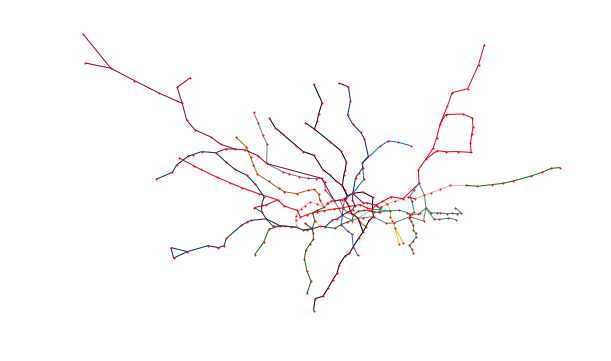

In [46]:
%matplotlib inline
import networkx as nx
from graphlib.classes import Graph
from util import get_subway_graph, draw_subway_graph

G, lines = get_subway_graph('csv', Graph)
draw_subway_graph(G, lines, figsize=(10,6))

In [47]:
import random
import queue as Q

def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    _tree = nx.Graph()
    _nodos = {}
    infinity=99999999999
    _minimos = Q.PriorityQueue()
    _visitados = []
       
    if origin == None:
        origin = random.choice(list(G.node.keys()))
    
    for nodo in G.node:
        if nodo == origin:
            _nodos[origin] = [0, None]
            _minimos.put([0, nodo])
        else:
            _nodos[nodo] = [infinity, None]
        _tree.add_node(nodo, G.node[nodo])
    
    while len(_visitados) < len(G):
        # Sacamos de la cola con prioridad al nodo con menos coste
        aux = _minimos.get()
        
        # Si ya lo hemos visitados, vamos sacando nodos hasta encontrar uno que no hayamos visitado
        while aux[1] in _visitados:
            aux = _minimos.get()
        
        _actual = aux[1]
        
        for vecino in G[_actual]:
            if vecino not in _visitados:
                coste = G[_actual][vecino]['distance']
                if coste < _nodos[vecino][0]:
                    _nodos[vecino] = [coste, _actual]
                    _minimos.put([coste, vecino])
        
        # Añadimos el nodo visitado a la lista de visitados
        _visitados.append(_actual)
    
    for nodo in list(_nodos.keys()):
        if nodo != origin:
            _tree.add_edge(nodo, _nodos[nodo][1], G[nodo][_nodos[nodo][1]])
    
    return _tree

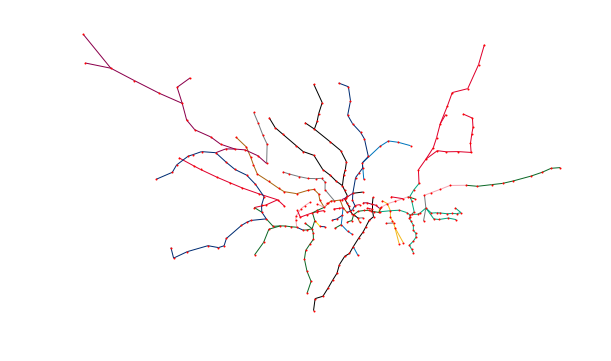

306 305


/Users/Carolina/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Carolina/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Carolina/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Carolina/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

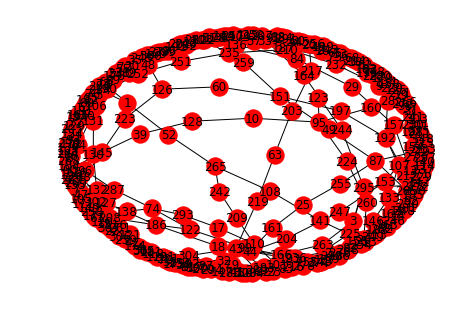

In [48]:
t = prim(G)
draw_subway_graph(t, lines, figsize=(10,6))
print(len(t.nodes()), len(t.edges()))
nx.draw(t, with_labels=True)

/Users/Carolina/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Carolina/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Carolina/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Carolina/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

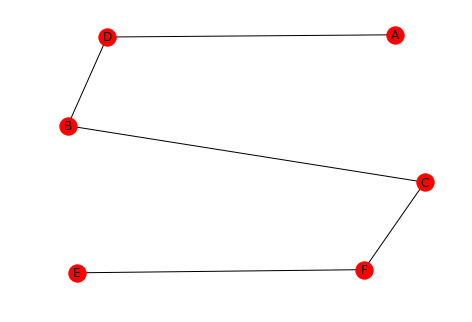

In [49]:
G2 = nx.Graph()
G2.add_nodes_from(("A", "B", "C", "D", "E", "F"))
G2.add_edges_from((("A", "B"), ("A", "D"), ("A", "C")))
G2.add_edges_from((("B", "A"), ("B", "D"), ("B", "C")))
G2.add_edges_from((("C", "B"), ("C", "D"), ("C", "F"), ("C", "E"), ("C", "A")))
G2.add_edges_from((("D", "A"), ("D", "B"), ("D", "C"), ("D", "F")))
G2.add_edges_from((("E", "C"), ("E", "F")))
G2.add_edges_from((("F", "E"), ("F", "D"), ("F", "C")))
G2["A"]["B"]['distance'] = 5
G2["A"]["C"]['distance'] = 6
G2["A"]["D"]['distance'] = 4
G2["B"]["C"]['distance'] = 1
G2["B"]["D"]['distance'] = 2
G2["C"]["D"]['distance'] = 2
G2["C"]["E"]['distance'] = 5
G2["C"]["F"]['distance'] = 3
G2["D"]["F"]['distance'] = 4
G2["E"]["F"]['distance'] = 4

t = prim(G2)
nx.draw(t, with_labels=True)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

_Escribe tu respuesta en este bloque_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>